In [1]:
import cv2 # type: ignore
import matplotlib.pyplot as plt

from ultralytics import YOLO

In [2]:
def show_label(img_path, label_path, class_names):
    img = cv2.imread(img_path)
    h, w, _ = img.shape

    with open(label_path, "r") as f:
        labels = f.readlines()

    for label in labels:
        cls, x_center, y_center, bw, bh = map(float, label.strip().split())
        cls = int(cls)


        x_center, y_center, bw, bh = x_center * w, y_center * h, bw * w, bh * h
        x1 = int(x_center - bw / 2)
        y1 = int(y_center - bh / 2)
        x2 = int(x_center + bw / 2)
        y2 = int(y_center + bh / 2)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, class_names[cls], (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)


    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

#### Sample in train-set

In [3]:
class_names = ["Apple", "Banana", "Grape", "Orange", "Pineapple", "Watermelon"]

image_name = "0a8543063cd9b347_jpg.rf.a3db9033a6b55e8af78902519cd77a19.jpg"

train_image_path = "Data/train/images/" + image_name
train_label_path = train_image_path.replace("images", "labels").replace(".jpg", ".txt")

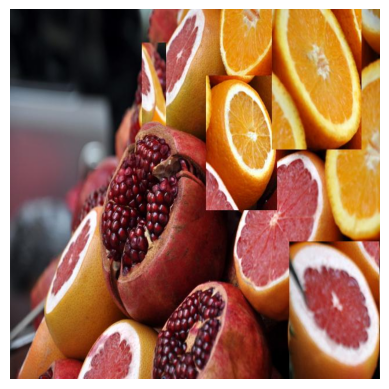

In [4]:
def to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

image = cv2.imread(train_image_path)

plt.imshow(to_rgb(image))
plt.axis("off")
plt.show()

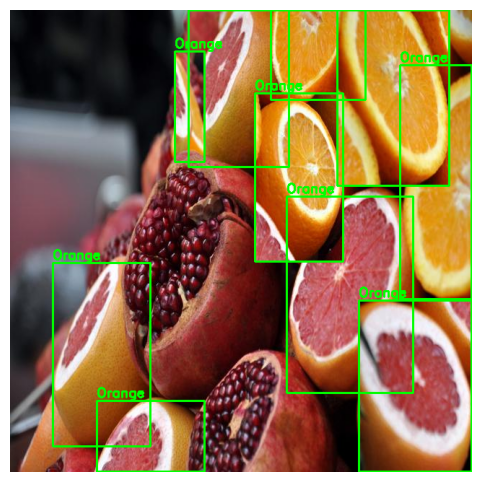

In [5]:
show_label(train_image_path, train_label_path, class_names)

## Training

In [6]:
eg_model = YOLO("yolov8n.pt")
eg_model.train(
    data="Data/data.yaml",   
    epochs=2,          
    imgsz=320,          
    batch=8,
    device='cpu'   
)

Ultralytics 8.3.175  Python-3.11.9 torch-2.7.0+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Data/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

train: Scanning D:\us\Projects\fruit_detection\Data\train\labels.cache... 7108 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7108/7108 [00:00<?, ?it/s]

train: D:\us\Projects\fruit_detection\Data\train\images\3d8be4f881b8c54c_jpg.rf.0d7b6d095459cece040b47b246d807af.jpg: 1 duplicate labels removed
train: D:\us\Projects\fruit_detection\Data\train\images\3d8be4f881b8c54c_jpg.rf.64e869a9bedd5f012cc2a1129c6ca229.jpg: 1 duplicate labels removed



c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


val: Fast image access  (ping: 5.88.0 ms, read: 3.31.8 MB/s, size: 59.8 KB)


val: Scanning D:\us\Projects\fruit_detection\Data\valid\labels.cache... 914 images, 0 backgrounds, 0 corrupt: 100%|██████████| 914/914 [00:00<?, ?it/s]

val: D:\us\Projects\fruit_detection\Data\valid\images\3d3ddc3054b32eb7_jpg.rf.03e7789aaf5212e2634b84ef502e0832.jpg: 1 duplicate labels removed



c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G       1.21      2.552      1.264         66        320: 100%|██████████| 889/889 [18:46<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [01:05<00:00,  1.13s/it]


                   all        914       3227      0.281      0.249      0.171     0.0934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      1.099       1.85      1.199         19        320: 100%|██████████| 889/889 [15:32<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:52<00:00,  1.11it/s]


                   all        914       3227      0.417      0.371      0.326      0.202

2 epochs completed in 0.605 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.175  Python-3.11.9 torch-2.7.0+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:44<00:00,  1.31it/s]


                   all        914       3227      0.416      0.369      0.325      0.202
                 Apple        188        557      0.437      0.341      0.332      0.224
                Banana        167        390      0.527      0.333      0.366      0.208
                 Grape        199        809      0.431      0.281      0.267      0.144
                Orange        197       1100      0.314      0.543      0.377      0.234
             Pineapple         77        154      0.454      0.286      0.255      0.158
            Watermelon        107        217      0.333      0.433      0.353      0.242
Speed: 0.6ms preprocess, 32.8ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000203C3522150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

In [ ]:
baseline_model = YOLO("yolov8n.pt")
baseline_model.train(
    data="Data/data.yaml",   
    epochs=50,          
    imgsz=640,          
    batch=16,
    device=0
)

fine_tune_model = YOLO("yolov8s.pt")
fine_tune_model.train(
    data="Data/data.yaml",  
    epochs=80,          
    imgsz=640,          
    batch=16,           
    device=0,           
    optimizer="AdamW", 
    lr0=0.001,         
    weight_decay=0.0005 
)

### Testing

#### Baseline

In [8]:
base_line_model = YOLO("baseline_model/best.pt")

metrics = base_line_model.val(data="Data/data.yaml")

print("mAP50:    ", metrics.box.map50)     
print("mAP50-95: ", metrics.box.map)      
print("Precision:", metrics.box.mp)
print("Recall:   ", metrics.box.mr)

Ultralytics 8.3.175  Python-3.11.9 torch-2.7.0+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 212.681.5 MB/s, size: 50.1 KB)


val: Scanning D:\us\Projects\fruit_detection\Data\valid\labels.cache... 914 images, 0 backgrounds, 0 corrupt: 100%|██████████| 914/914 [00:00<?, ?it/s]

val: D:\us\Projects\fruit_detection\Data\valid\images\3d3ddc3054b32eb7_jpg.rf.03e7789aaf5212e2634b84ef502e0832.jpg: 1 duplicate labels removed



c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [01:52<00:00,  1.95s/it]


                   all        914       3227      0.663      0.432      0.495      0.333
                 Apple        188        557      0.663      0.419      0.504      0.356
                Banana        167        390      0.667      0.459      0.504      0.307
                 Grape        199        809      0.631      0.359      0.396      0.261
                Orange        197       1100      0.667      0.342      0.423       0.27
             Pineapple         77        154        0.7      0.439      0.519      0.337
            Watermelon        107        217      0.652      0.576      0.621      0.468
Speed: 1.6ms preprocess, 109.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val
mAP50:     0.49458779735565545
mAP50-95:  0.333150882910876
Precision: 0.6630576639927502
Recall:    0.4323731621098837


#### Fine-tune

In [9]:
fine_tune_model = YOLO("fine_tune_model/best.pt")

metrics = fine_tune_model.val(data="Data/data.yaml")

print("mAP50:    ", metrics.box.map50)     
print("mAP50-95: ", metrics.box.map)      
print("Precision:", metrics.box.mp)
print("Recall:   ", metrics.box.mr)

Ultralytics 8.3.175  Python-3.11.9 torch-2.7.0+cpu CPU (Intel Core(TM) i7-8565U 1.80GHz)
Model summary (fused): 72 layers, 11,127,906 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 298.689.7 MB/s, size: 59.6 KB)


val: Scanning D:\us\Projects\fruit_detection\Data\valid\labels.cache... 914 images, 0 backgrounds, 0 corrupt: 100%|██████████| 914/914 [00:00<?, ?it/s]

val: D:\us\Projects\fruit_detection\Data\valid\images\3d3ddc3054b32eb7_jpg.rf.03e7789aaf5212e2634b84ef502e0832.jpg: 1 duplicate labels removed



c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [04:49<00:00,  5.00s/it]


                   all        914       3227      0.665      0.462      0.523      0.358
                 Apple        188        557      0.663      0.479      0.529       0.37
                Banana        167        390      0.661      0.449      0.522      0.318
                 Grape        199        809       0.63      0.384      0.427      0.284
                Orange        197       1100      0.651      0.347      0.437      0.287
             Pineapple         77        154      0.736      0.468      0.532      0.376
            Watermelon        107        217       0.65      0.642      0.689      0.513
Speed: 1.6ms preprocess, 301.0ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\detect\val2
mAP50:     0.5225181049273884
mAP50-95:  0.35791175403319286
Precision: 0.665038512149971
Recall:    0.4616072188861721
